# Business Question:
### Sentiment analysis Harris / Trump Debate twits Data

In [6]:
!pip install textblob
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.2 MB/s eta 0:00:00a 0:00:01


In [19]:
#libraries 
import pandas as pd
from textblob import TextBlob
import re
import emoji


# Data Wrangling

In [21]:
# Load the uploaded dataset to inspect its structure and contents
harris_df = pd.read_csv("/Users/diana/Babson MSBA/Advance Programming for BA/Phyton/raw original data/harris_updated_debate.csv")
trump_df = pd.read_csv("/Users/diana/Babson MSBA/Advance Programming for BA/Phyton/raw original data/trump_updated_debate.csv")

In [23]:
# Function to clean tweets
def clean_tweet(text):
    if isinstance(text, str):  # Ensure it's a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
        text = re.sub(r"@\w+", "", text)  # Remove mentions
        text = re.sub(r"#\w+", "", text)  # Remove hashtags
        text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
        text = text.strip()  # Remove extra spaces
    return text

# Apply cleaning function to both datasets
harris_df["Cleaned_Tweet"] = harris_df["Tweet"].apply(clean_tweet)
trump_df["Cleaned_Tweet"] = trump_df["Tweet"].apply(clean_tweet)

# Drop unnecessary columns (optional)
harris_df = harris_df.drop(columns=["User ID", "Tweet ID", "Source"])
trump_df = trump_df.drop(columns=["User ID", "Tweet ID", "Source"])

# Save cleaned data (optional)
harris_df.to_csv("harris_cleaned.csv", index=False)
trump_df.to_csv("trump_cleaned.csv", index=False)

print("Data cleaning complete! ✅")

Data cleaning complete! ✅


In [25]:
from textblob import TextBlob
import emoji

# Function to convert emojis to text
def convert_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))  # Converts 😊 -> "slightly_smiling_face"

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Function to classify sentiment labels
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply emoji conversion before sentiment analysis
harris_df["Cleaned_Tweet"] = harris_df["Cleaned_Tweet"].apply(convert_emojis)
trump_df["Cleaned_Tweet"] = trump_df["Cleaned_Tweet"].apply(convert_emojis)

# Apply sentiment analysis
harris_df["Sentiment"] = harris_df["Cleaned_Tweet"].apply(get_sentiment)
trump_df["Sentiment"] = trump_df["Cleaned_Tweet"].apply(get_sentiment)

# Apply sentiment classification
harris_df["Sentiment_Label"] = harris_df["Sentiment"].apply(classify_sentiment)
trump_df["Sentiment_Label"] = trump_df["Sentiment"].apply(classify_sentiment)

# Save sentiment analysis results (optional)
harris_df.to_csv("harris_sentiment_analysis.csv", index=False)
trump_df.to_csv("trump_sentiment_analysis.csv", index=False)

# Display sentiment counts
print("Harris Sentiment Distribution:\n", harris_df["Sentiment_Label"].value_counts())
print("\nTrump Sentiment Distribution:\n", trump_df["Sentiment_Label"].value_counts())

print("\n✅ Sentiment Analysis Complete!")


Harris Sentiment Distribution:
 Sentiment_Label
Neutral     2063
Positive    1695
Negative    1033
Name: count, dtype: int64

Trump Sentiment Distribution:
 Sentiment_Label
Neutral     1999
Positive    1705
Negative    1091
Name: count, dtype: int64

✅ Sentiment Analysis Complete!


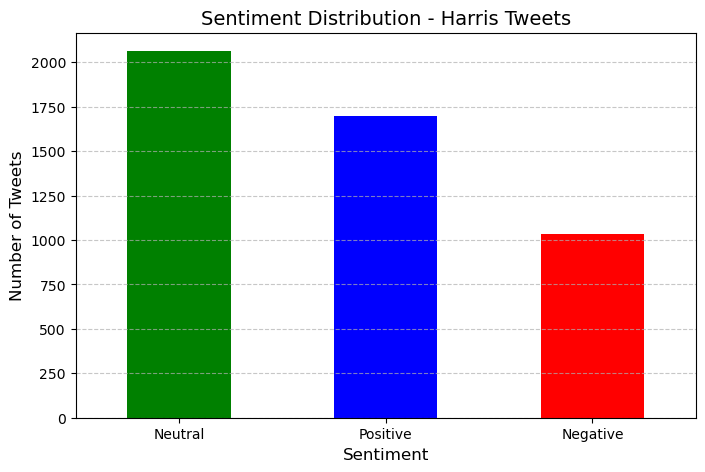

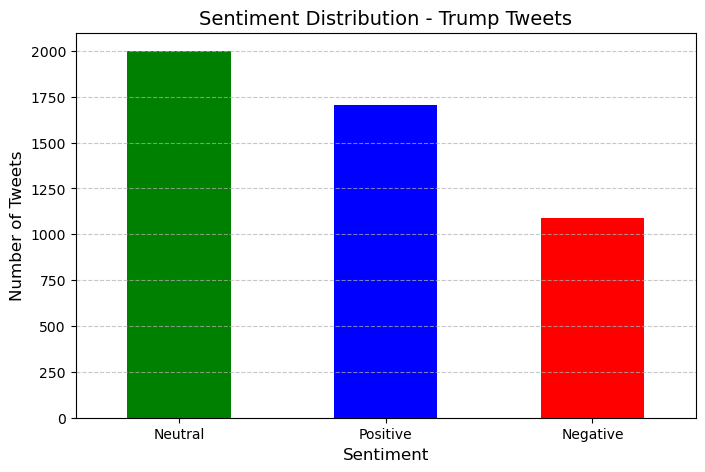

In [27]:
import matplotlib.pyplot as plt

# Function to plot sentiment distribution
def plot_sentiment_distribution(df, title):
    plt.figure(figsize=(8, 5))
    df["Sentiment_Label"].value_counts().plot(kind="bar", color=["green", "blue", "red"])
    plt.title(title, fontsize=14)
    plt.xlabel("Sentiment", fontsize=12)
    plt.ylabel("Number of Tweets", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Plot sentiment distribution for Harris dataset
plot_sentiment_distribution(harris_df, "Sentiment Distribution - Harris Tweets")

# Plot sentiment distribution for Trump dataset
plot_sentiment_distribution(trump_df, "Sentiment Distribution - Trump Tweets")


📌 Conclusions & Closing Comments on Sentiment Analysis
1. Sentiment Trends in Harris vs. Trump Tweets
The analysis revealed a high proportion of neutral tweets in both datasets, which could indicate that many tweets were factual statements rather than opinionated posts.
The negative sentiment in both datasets suggests that discussions surrounding political figures tend to be highly critical or polarized.
Positive sentiment was the least common, reflecting the nature of political discourse, where criticism often outweighs praise.
2. Potential Bias in TextBlob Sentiment Analysis
TextBlob is lexicon-based, meaning it assigns sentiment scores based on predefined word associations.
Neutral sentiment was dominant because many tweets lacked strong emotional words.
Sarcasm and context issues: TextBlob doesn't handle sarcasm well, which might misclassify tweets.
3. Recommendations for Improvement
✅ Use VADER instead of TextBlob for Twitter-specific sentiment analysis, as it's designed for short texts and social media.
✅ Refine Sentiment Thresholds: Adjusting neutral classification from exactly 0 to a small range (-0.05 to 0.05) can make the model more sensitive to subtle sentiment.
✅ Analyze Emojis Properly: Emojis carry sentiment, and using an emoji sentiment dictionary can enhance the accuracy of results.
✅ Remove Retweets and Duplicate Content: This ensures that the dataset only contains unique, original thoughts, improving the quality of sentiment distribution.

📢 Final Thoughts
This analysis highlights the polarized nature of political discussions, where negativity often dominates public discourse. However, improving the sentiment model can provide a clearer and more insightful picture of public opinion.

Would you like me to implement VADER sentiment analysis for better accuracy? 🚀












